# A06 - Analisis de datos
## Leonardo Rodriguez Hernandez     17-04-2024

**Problema 1**

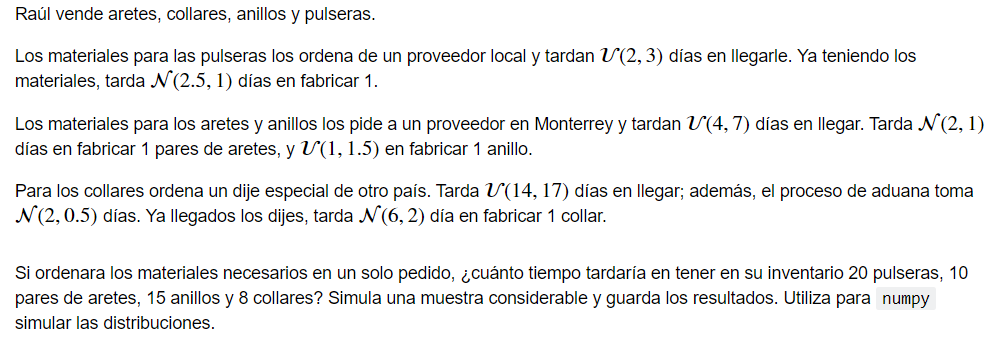


In [3]:
import numpy as np

def tiempo_llegada(material):
    if material == 'pulseras':
        return np.random.uniform(2, 3)
    elif material in ['aretes', 'anillos']:
        return np.random.uniform(4, 7)
    elif material == 'collares':
        return np.random.uniform(14, 17)

def tiempo_fabricacion(material):
    if material == 'pulseras':
        return np.random.normal(2.5, 1)
    elif material == 'aretes':
        return np.random.normal(2, 1)
    elif material == 'anillos':
        return np.random.uniform(1, 1.5)
    elif material == 'collares':
        return np.random.normal(6, 2)

def tiempo_total_inventario():
    tiempos = []
    tiempos.append(sum([tiempo_llegada('pulseras') + tiempo_fabricacion('pulseras') for _ in range(20)]))
    tiempos.append(sum([tiempo_llegada('aretes') + tiempo_fabricacion('aretes') for _ in range(10)]))
    tiempos.append(sum([tiempo_llegada('anillos') + tiempo_fabricacion('anillos') for _ in range(15)]))
    tiempos.append(sum([tiempo_llegada('collares') + tiempo_fabricacion('collares') for _ in range(8)]))
    return max(tiempos)

tiempos_totales = [tiempo_total_inventario() for _ in range(10000)]
print("Dias promedio:", np.mean(tiempos_totales))
print("Desviación estándar:", np.std(tiempos_totales))


Dias promedio: 172.0343074104566
Desviación estándar: 6.2354522827244825


**Problema 2**

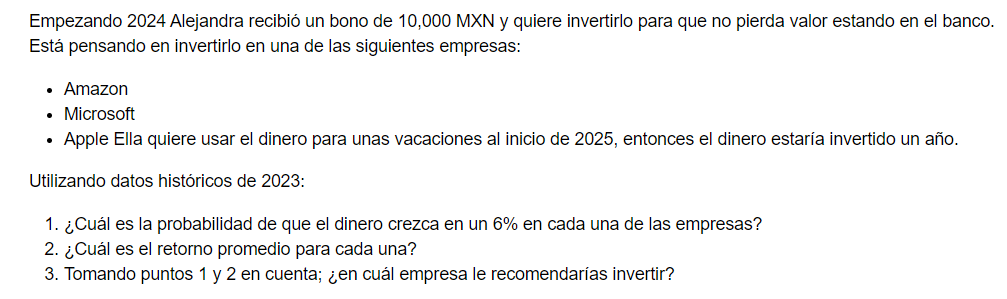

In [1]:
import yfinance as yf
import numpy as np

def getclose(names, start, end):
    return yf.download(names, start=start, end=end)[["Adj Close"]]

def simulacion(mean, std, start, dias, num_sim):
    retorno_diario = np.random.normal(mean, std, (dias, num_sim))
    return (1 + retorno_diario).cumprod()

empresas = ["AMZN", "MSFT", "AAPL"]
start_date = "2023-01-01"
end_date = "2023-12-31"

precios = getclose(empresas, start_date, end_date)
retornos = precios.pct_change()

probabilidad = (retornos > 0.06).mean()

print("Probabilidad de crecimiento del 6% en 2023:", probabilidad)

promedio = retornos.mean()
print("Retorno promedio en 2023:", promedio)

retornos_esp = probabilidad * promedio
recomendacion = retornos_esp.idxmax()
print("Invertir en: ", recomendacion)



[*********************100%%**********************]  3 of 3 completed
Probabilidad de crecimiento del 6% en 2023: Adj Close  AAPL    0.000
           AMZN    0.012
           MSFT    0.004
dtype: float64
Retorno promedio en 2023: Adj Close  AAPL    0.001835
           AMZN    0.002511
           MSFT    0.001972
dtype: float64
Invertir en:  ('Adj Close', 'AMZN')


Por lo tanto, debe invertir en Amazon.